<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
df = pd.read_csv('bike_sharing_data.txt')
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

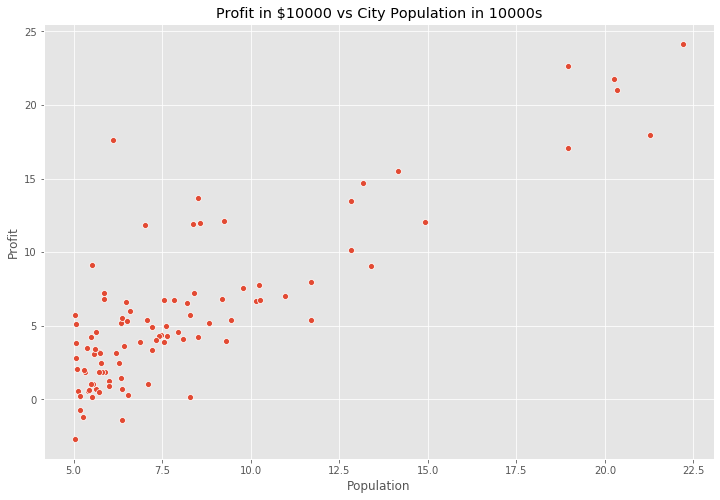

In [6]:
ax = sns.scatterplot(x='Population', y='Profit', data=df)
ax.set_title('Profit in $10000 vs City Population in 10000s')
plt.show()

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [21]:
def cost_function(X, y, theta):
#     m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    return 1/(2*m)*np.sum(error)    

In [22]:
m = df.Population.values.size
X = np.append(np.ones((m, 1)), df.Population.values.reshape(m,1), axis=1)
y = df.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))

In [23]:
cost_function(X, y, theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [26]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred-y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [27]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations = 2000)

In [33]:
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0],2))))

h(x) = -3.89 + 1.19x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [34]:
from mpl_toolkits.mplot3d import Axes3D

In [38]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)
cost_values = np.zeros((len(theta_0), len(theta_1)))

In [39]:
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

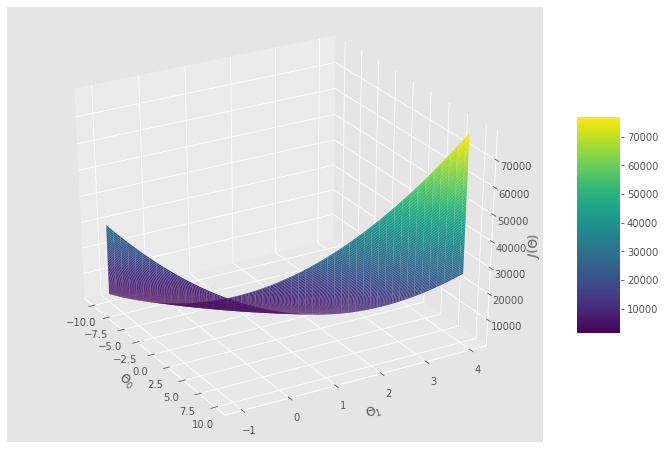

In [40]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)
plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

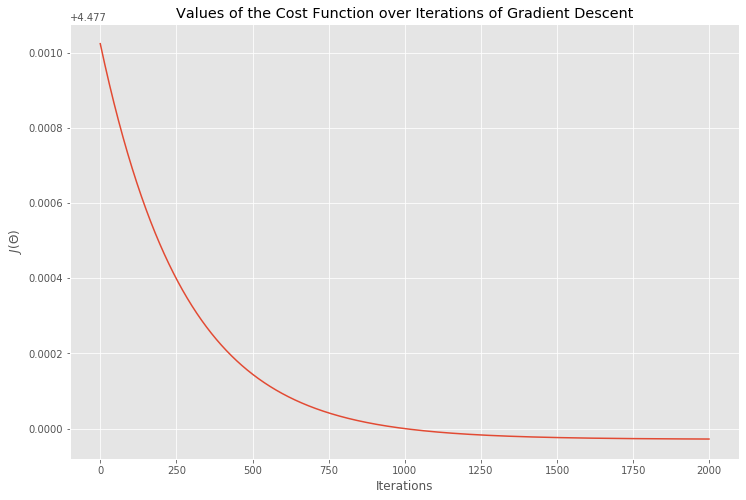

In [42]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title("Values of the Cost Function over Iterations of Gradient Descent")
plt.show()

### Task 8: Training Data with Linear Regression Fit
---

In [43]:
theta

array([[-3.89286253],
       [ 1.19274046]])

In [46]:
theta = np.squeeze(theta)
theta

array([-3.89286253,  1.19274046])

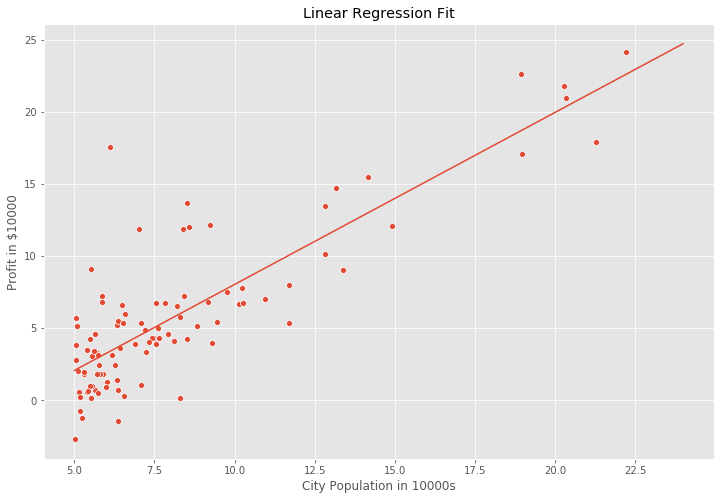

In [50]:
sns.scatterplot(x='Population', y='Profit', data=df)

x_value = [x for x in range(5, 25)]
y_value = [(x*theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('City Population in 10000s')
plt.ylabel('Profit in $10000')
plt.title('Linear Regression Fit');
# plt.show()

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [51]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [52]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1)))

For a population of 40,000 people, the model predicts a profit of $8781.0


In [55]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $" + str(round(y_pred_2)))

For a population of 83,000 people, the model predicts a profit of $60069.0
